In [1]:
import os
import numpy as np
import cv2
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

# Task 1 : Create Global Color Histogram

In [2]:
## Images and Descriptors Location 

DATASET_FOLDER = 'MSRC_ObjCategImageDatabase_v2'
OUT_FOLDER = 'descriptors'
OUT_SUBFOLDER = 'globalRGBhisto' ## Output Folder for Color Histogram 

In [3]:
from cvpr_computedescriptors import create_global_color_hist

create_global_color_hist(26, # Level of Quantization
                         DATASET_FOLDER,
                         OUT_FOLDER,
                         OUT_SUBFOLDER) # Creates Descriptor based on Color Histogram 

Successfully Created Global Color Descriptors


In [69]:
from cvpr_visualsearch import load_descriptors
from cvpr_compute_distance_measure import cvpr_compare
from random import randint

DESCRIPTOR_FOLDER = 'descriptors'
DESCRIPTOR_SUBFOLDER = 'globalRGBhisto'
IMAGE_FOLDER = 'MSRC_ObjCategImageDatabase_v2'
query_image = 'MSRC_ObjCategImageDatabase_v2/Images/7_9_s.bmp'

    
ALLFILES , COLOR_HIST_ALLFEAT = load_descriptors(IMAGE_FOLDER,
                                                         DESCRIPTOR_FOLDER,
                                                         DESCRIPTOR_SUBFOLDER)

# Find the index of the Query Image in the ALLFILES array
try:
    position = ALLFILES.index(query_image)
    print(f"The position of Query Image : '{query_image}' in ALLFILES is: {position}")
except ValueError:
    print(f"'{target_file}' is not found in ALLFILES.")
    

NIMG = COLOR_HIST_ALLFEAT.shape[0]
#queryimg = randint(0, NIMG - 1)
queryimg = position # Query image index fixed

# Compute the distance between the query and all other descriptors
dst = []
query = COLOR_HIST_ALLFEAT[queryimg]
for i in range(NIMG):
    candidate = COLOR_HIST_ALLFEAT[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst.append((distance, i))

# Sort the distances
dst.sort(key=lambda x: x[0])


The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/7_9_s.bmp' in ALLFILES is: 312


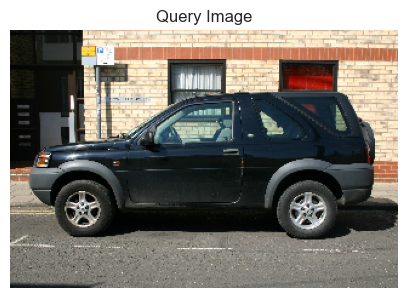

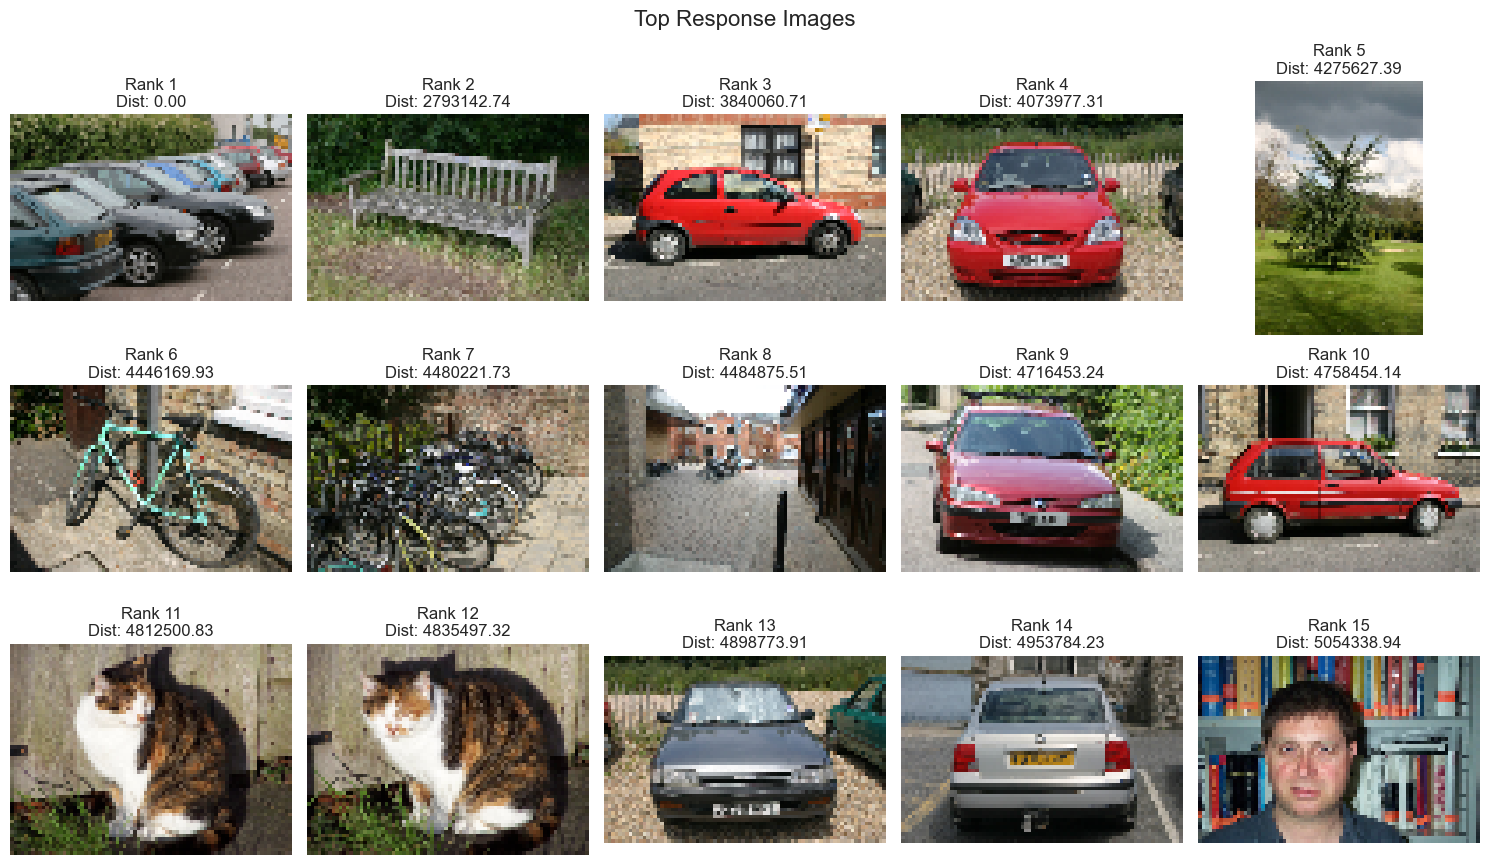

In [70]:
import matplotlib.pyplot as plt
import cv2

def display_query_and_top_responses(query_img_index, 
                                    response_indices, 
                                    file_paths, num_responses=15, grid_shape=(3, 5)):
    """
    Display a query image and the top response images in a grid.

    Parameters:
        query_img_index (int): Index of the query image in file_paths.
        response_indices (list of tuples): List of tuples where each tuple contains (distance, index) for response images.
        file_paths (dict): Dictionary mapping image indices to their file paths.
        num_responses (int): Number of top responses to display. Default is 15.
        grid_shape (tuple): Shape of the grid layout for response images. Default is (3, 5).
    """
    # Display the query image
    plt.figure(figsize=(5, 5))
    query_image_path = file_paths[query_img_index]
    query_image = cv2.imread(query_image_path)
    query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    plt.imshow(query_image)
    plt.title("Query Image")
    plt.axis('off')
    plt.show()

    # Display the top response images in a grid layout
    rows, cols = grid_shape
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    fig.suptitle("Top Response Images", fontsize=16)

    for i in range(min(num_responses, rows * cols)):
        img_index = response_indices[i+1][1]  # Index of response image
        img_path = file_paths[img_index]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img.shape[1] // 4, img.shape[0] // 4))  # Resize for display

        # Determine position in the grid
        row, col = divmod(i, cols)
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"Rank {i + 1}\nDist: {response_indices[i][0]:.2f}")
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust top to fit the main title
    plt.show()
    
display_query_and_top_responses(query_img_index=queryimg, 
                                    response_indices=dst, 
                                    file_paths=ALLFILES, num_responses=15, grid_shape=(3, 5))

### Experiment 1.1 : Calc AUC for different value of Colour Quantization 

In [6]:
import pandas as pd
from cvpr_compute_distance_measure import calculate_auc_for_descriptors
from cvpr_computedescriptors import colour_histogram

# Setting up
distance_measures = ['L2']

query_img_index = queryimg  # Specify the index of the query image

# Initialize a DataFrame to store results
auc_results_df = pd.DataFrame(columns=['Q', 'Descriptor', 'Distance Measure', 'AUC'])

for Q in range(2, 31, 2):  # Iterate over different levels of Q
    TEMP_COLOR_TEXT_ALLFEAT = []

    for IMG_PATH in ALLFILES:
        image = cv2.imread(IMG_PATH).astype(np.float64) / 255.0  # Load and Normalize the image
        temp_color_hist = colour_histogram(image, Q)  # Compute color histogram
        TEMP_COLOR_TEXT_ALLFEAT.append(temp_color_hist)

    TEMP_COLOR_TEXT_ALLFEAT = np.array(TEMP_COLOR_TEXT_ALLFEAT)

    # Prepare descriptors
    descriptors = {
        'COLOR_HIST': TEMP_COLOR_TEXT_ALLFEAT
    }

    # Calculate AUC for the current Q
    auc_df = calculate_auc_for_descriptors(query_img_index, descriptors, distance_measures, ALLFILES)
    auc_df['Q'] = Q  # Add the current Q value to the DataFrame

    # Append results to the main DataFrame
    auc_results_df = pd.concat([auc_results_df, auc_df], ignore_index=True)

# Save the results or process further
print(auc_results_df)


     Q  Descriptor Distance Measure       AUC
0    2  COLOR_HIST               L2  0.075669
1    4  COLOR_HIST               L2  0.089701
2    6  COLOR_HIST               L2  0.155214
3    8  COLOR_HIST               L2  0.179944
4   10  COLOR_HIST               L2  0.171939
5   12  COLOR_HIST               L2  0.182687
6   14  COLOR_HIST               L2  0.205854
7   16  COLOR_HIST               L2  0.218795
8   18  COLOR_HIST               L2  0.210721
9   20  COLOR_HIST               L2  0.223557
10  22  COLOR_HIST               L2  0.222910
11  24  COLOR_HIST               L2  0.229162
12  26  COLOR_HIST               L2  0.234464
13  28  COLOR_HIST               L2  0.231826
14  30  COLOR_HIST               L2  0.235553


### Experiment 1.2: Determining the Class in Which the Colour Histogram Performs Best Based on the Optimal Level of Quantization Found in the Previous Step (Q = 26)

In [7]:
base_path = 'MSRC_ObjCategImageDatabase_v2/Images/'
distance_measures = ['L2']
Q = 26 # Optimum value found in previous step
query_img_path = []

for i in range(1,21):
    s = base_path+str(i)+'_1_s.bmp'
    query_img_path.append(s)

# Initialize a DataFrame to store results
auc_results_df_v12 = pd.DataFrame(columns=['Q','Class' ,'Descriptor', 'Distance Measure', 'AUC'])

TEMP_COLOR_ALLFEAT = []

for IMG_PATH in ALLFILES:
    image = cv2.imread(IMG_PATH).astype(np.float64) / 255.0  # Load and Normalize the image
    temp_color_hist = colour_histogram(image, Q)  # Compute color histogram
    TEMP_COLOR_ALLFEAT.append(temp_color_hist)

TEMP_COLOR_ALLFEAT = np.array(TEMP_COLOR_ALLFEAT)

# Prepare descriptors
descriptors = {
    'COLOR_HIST': TEMP_COLOR_ALLFEAT
}
    
for pos,tag in enumerate(query_img_path):
    try:
        query_img_loc = ALLFILES.index(tag)
        print(f"The position of Query Image : '{tag}' in ALLFILES is: {query_img_loc}")
    except ValueError:
        print(f"'{tag}' is not found in ALLFILES.")

    # Calculate AUC for the current Class
    auc_df = calculate_auc_for_descriptors(query_img_loc, descriptors, distance_measures, ALLFILES)
    auc_df['Q'] = Q   
    auc_df['Class'] = pos+1
    # Append results to the main DataFrame
    auc_results_df_v12 = pd.concat([auc_results_df_v12, auc_df], ignore_index=True)


# Save the results or process further
print(auc_results_df_v12)


The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/1_1_s.bmp' in ALLFILES is: 511
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/2_1_s.bmp' in ALLFILES is: 420
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/3_1_s.bmp' in ALLFILES is: 300
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/4_1_s.bmp' in ALLFILES is: 60
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/5_1_s.bmp' in ALLFILES is: 100
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/6_1_s.bmp' in ALLFILES is: 287
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/7_1_s.bmp' in ALLFILES is: 177
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/8_1_s.bmp' in ALLFILES is: 562
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/9_1_s.bmp' in ALLFILES is: 457
The position of Query Image : 'MSRC_ObjCategImageDatabase_v2/Images/10_1_s.bmp' in ALLFILES is: 298
The positi

In [ ]:
## Pulling the Images of Best Performing class for Report 

import os
import cv2
import matplotlib.pyplot as plt

# Base path for the images
base_path = 'MSRC_ObjCategImageDatabase_v2/Images/'

# Classes to display
classes_to_display = [7, 8, 13, 20]

# List to store image data and titles
images = []
titles = []

for class_num in classes_to_display:
    img_path = base_path + f"{class_num}_1_s.bmp"  # Construct the file path
    if os.path.exists(img_path):
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
        # Resize image to a manageable size for display (optional)
        image = cv2.resize(image, (300, 300))  # Resize to 300x300 for consistent display
        images.append(image)
        titles.append(f"Class {class_num}")
    else:
        print(f"Image not found for class {class_num}: {img_path}")

# Ensure there are images to display
if len(images) == 0:
    print("No images found to display.")
else:
    # Plot the images in a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust figsize as needed

    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img)  # Display the image
        ax.set_title(title, fontsize=14)  # Add the class number as the title
        ax.axis('off')  # Hide axes

    plt.tight_layout()  # Automatically adjust spacing to prevent overlap
    plt.show()


# Task 2 : Generate Precision Recall Curve

In [71]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst[img_no][1]]) # dst Global Hist Q=26
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

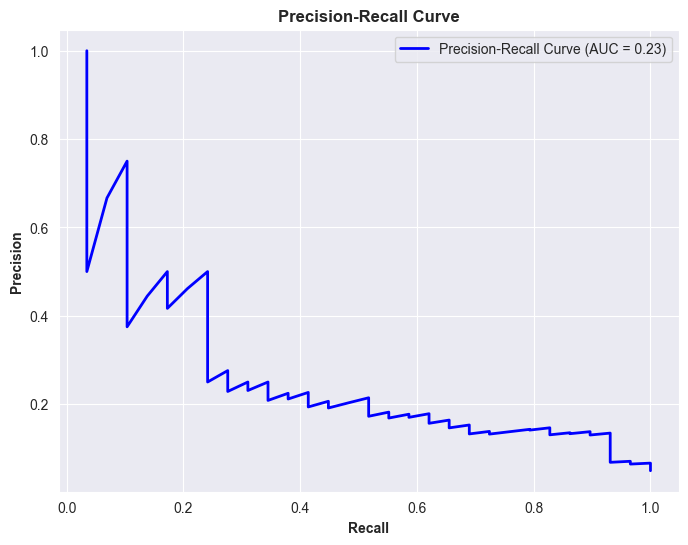

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

def plot_precision_recall_curve(response_class, query_class):
    """
    Calculate precision-recall values and plot the Precision-Recall curve.

    Parameters:
        response_class (list): List of classes for the retrieved items.
        query_class: The class of the query item to calculate relevance against.
    """
    precision = []
    recall = []
    relevant_retrieved = 0
    total_relevant = sum(1 for cls in response_class if cls == query_class)

    # Calculate precision and recall at each point
    for i, cls in enumerate(response_class):
        if cls == query_class:
            relevant_retrieved += 1

        current_precision = relevant_retrieved / (i + 1)
        current_recall = relevant_retrieved / total_relevant if total_relevant > 0 else 0

        precision.append(current_precision)
        recall.append(current_recall)

    # Calculate AUC for the precision-recall curve
    pr_auc = auc(recall, precision)

    # Plotting
    sns.set_style("darkgrid")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall', fontweight='bold')
    plt.ylabel('Precision', fontweight='bold')
    plt.title('Precision-Recall Curve', fontweight='bold')
    plt.legend(loc='best')
    plt.show()

    return None

plot_precision_recall_curve(response_class, query_class)

# Task 3 : Spatial Grid (Colour and Texture)

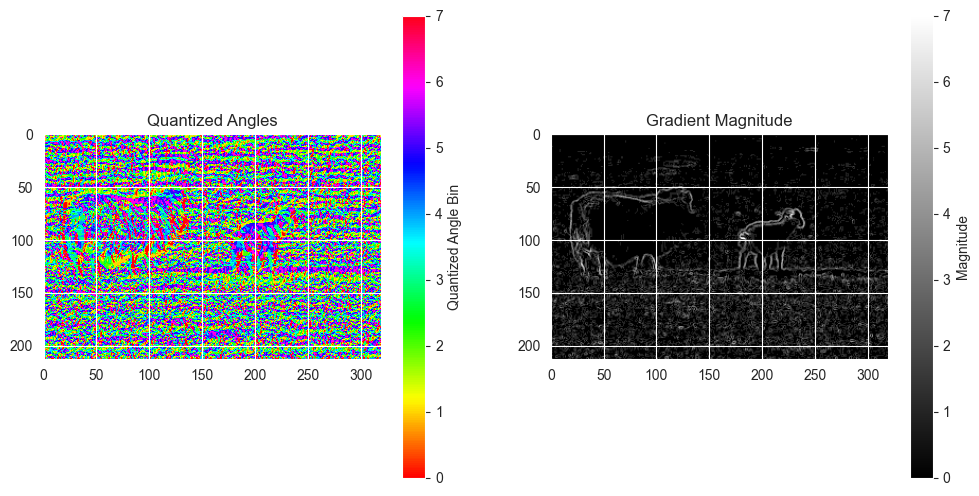

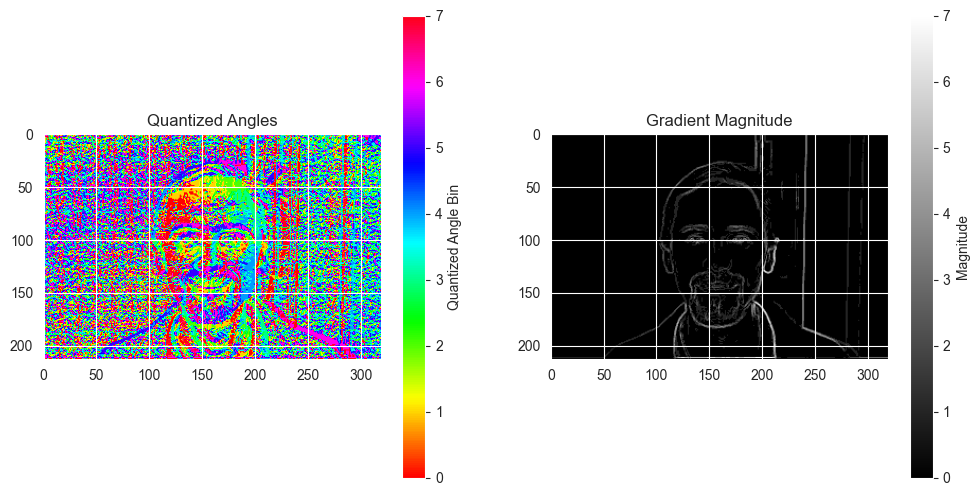

In [11]:
from cvpr_computedescriptors import sobel_quantization

for image_path in ALLFILES[:2]:
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Perform Sobel and angular quantization
    quantized_angles, quantized_magnitudes,magnitude = sobel_quantization(image, num_bins=8)

    # Visualize the quantized angles and magnitude
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(quantized_angles, cmap='hsv')  # Visualize quantized angles
    plt.title("Quantized Angles")
    plt.colorbar(label="Quantized Angle Bin")

    plt.subplot(1, 2, 2)
    plt.imshow(quantized_magnitudes, cmap='gray')  # Visualize magnitude
    plt.title("Gradient Magnitude")
    plt.colorbar(label="Magnitude")

    plt.show()

In [34]:
from cvpr_computedescriptors import color_texture_grid_descriptor

num_angular_bins = 8 

GRID_COLOR_TEXT_ALLFEAT = []
GRID_COLOR_ANGLE_ALLFEAT = []
GRID_COLOR_MAG_ALLFEAT = []

for IMG_PATH in ALLFILES:
    image = cv2.imread(IMG_PATH)
    
    temp_overall_descriptor, temp_color_angle_hist, temp_color_mag_hist = color_texture_grid_descriptor(
                                                                                image, 
                                                                                grid_size=(4, 4), 
                                                                                color_bins=26, 
                                                                                sobel_bins=8
                                                                            )
    GRID_COLOR_TEXT_ALLFEAT.append(temp_overall_descriptor) # Contains COLOR+ANG+MAG Based Descrip for each cell
    GRID_COLOR_ANGLE_ALLFEAT.append(temp_color_angle_hist) # Contains COLOR+ANG Based Descrip for each cell
    GRID_COLOR_MAG_ALLFEAT.append(temp_color_mag_hist) # Contains COLOR+MAG Based Descrip for each cell

GRID_COLOR_TEXT_ALLFEAT = np.array(GRID_COLOR_TEXT_ALLFEAT)
GRID_COLOR_TEXT_ALLFEAT = np.array(GRID_COLOR_TEXT_ALLFEAT).reshape(GRID_COLOR_TEXT_ALLFEAT.shape[0], -1)  # Flatten 2nd & 3rd Dimension

GRID_COLOR_ANGLE_ALLFEAT = np.array(GRID_COLOR_ANGLE_ALLFEAT)
GRID_COLOR_ANGLE_ALLFEAT = np.array(GRID_COLOR_ANGLE_ALLFEAT).reshape(GRID_COLOR_ANGLE_ALLFEAT.shape[0], -1)  # Flatten 2nd & 3rd Dimension

GRID_COLOR_MAG_ALLFEAT = np.array(GRID_COLOR_MAG_ALLFEAT)
GRID_COLOR_MAG_ALLFEAT = np.array(GRID_COLOR_MAG_ALLFEAT).reshape(GRID_COLOR_MAG_ALLFEAT.shape[0], -1)  # Flatten 2nd & 3rd Dimension


### Task 3.1.1 : Peformance Based on Grid + Colour + Textural Features (Angular+Magnitude) 

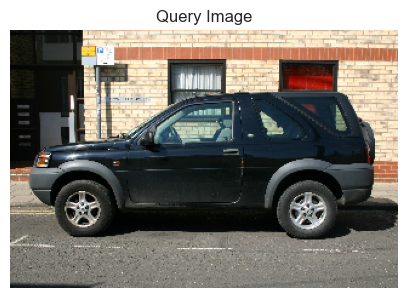

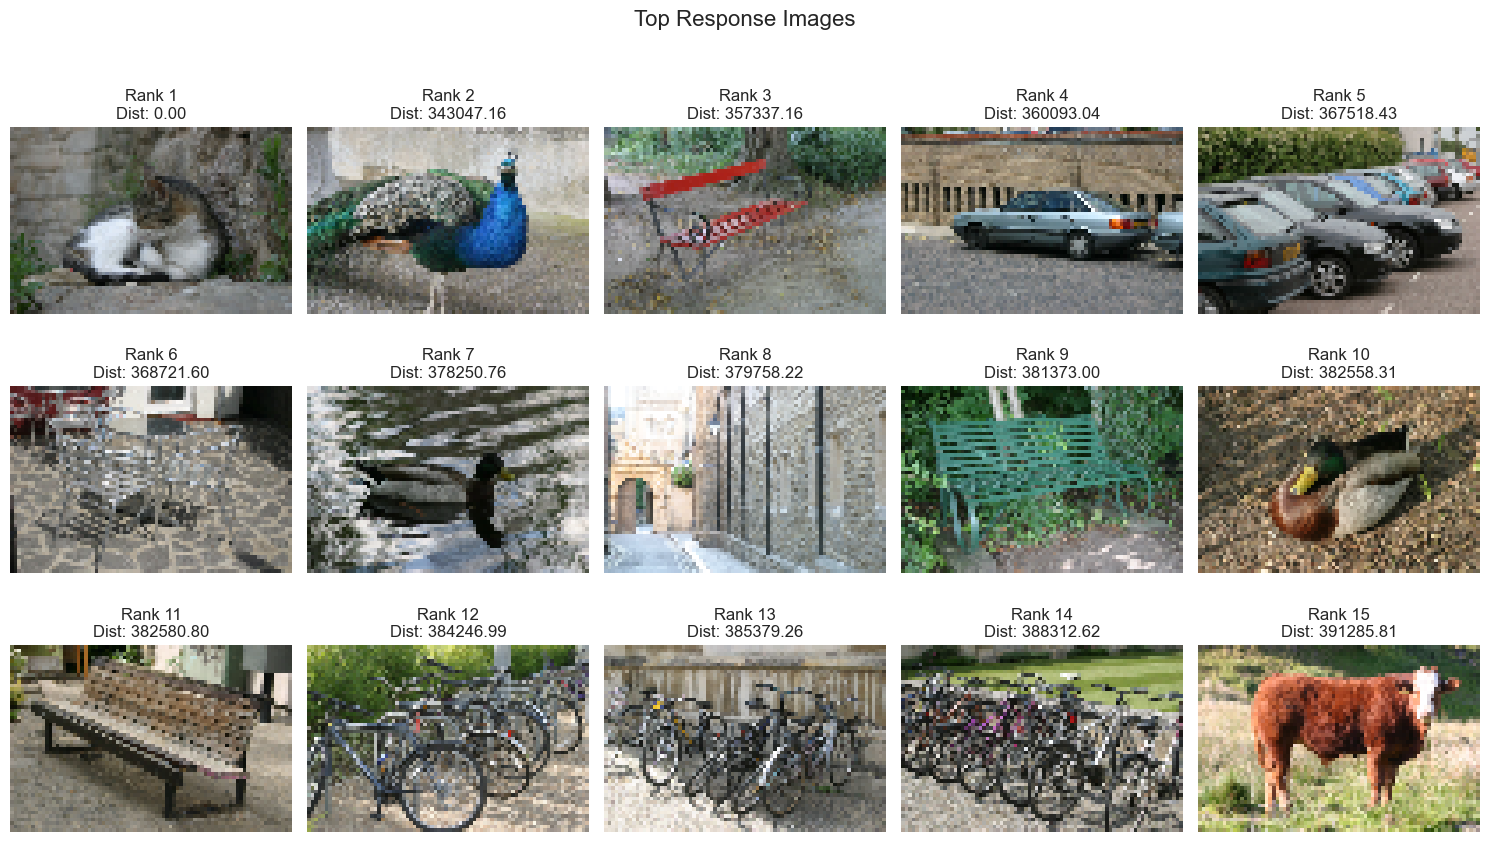

In [35]:
# Compute the distance between the query and all other descriptors
dst_grid_color_text = []
query = GRID_COLOR_TEXT_ALLFEAT[queryimg]
for i in range(NIMG):
    candidate = GRID_COLOR_TEXT_ALLFEAT[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst_grid_color_text.append((distance, i))

# Sort the distances
dst_grid_color_text.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_grid_color_text, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

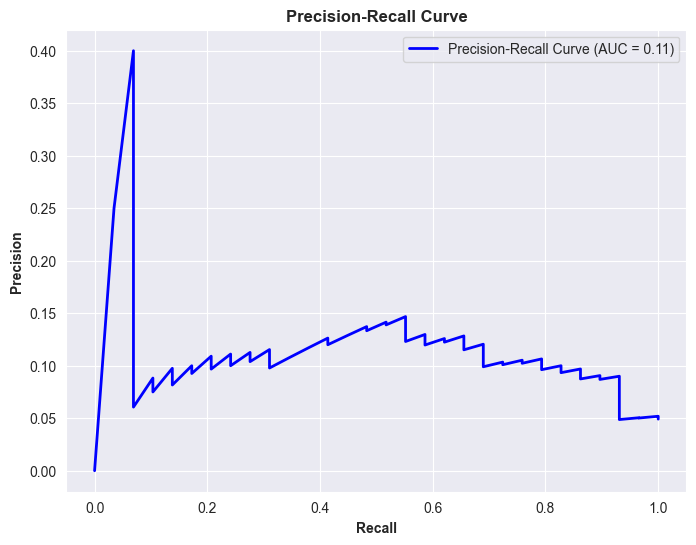

In [36]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_grid_color_text[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

### Task 3.1.2 : Peformance Based on Grid + Colour + Angular Histogram  

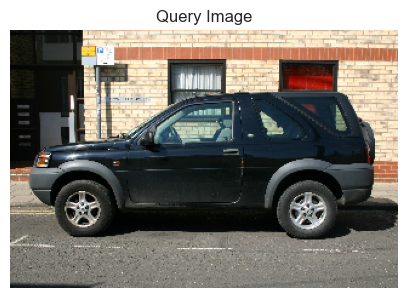

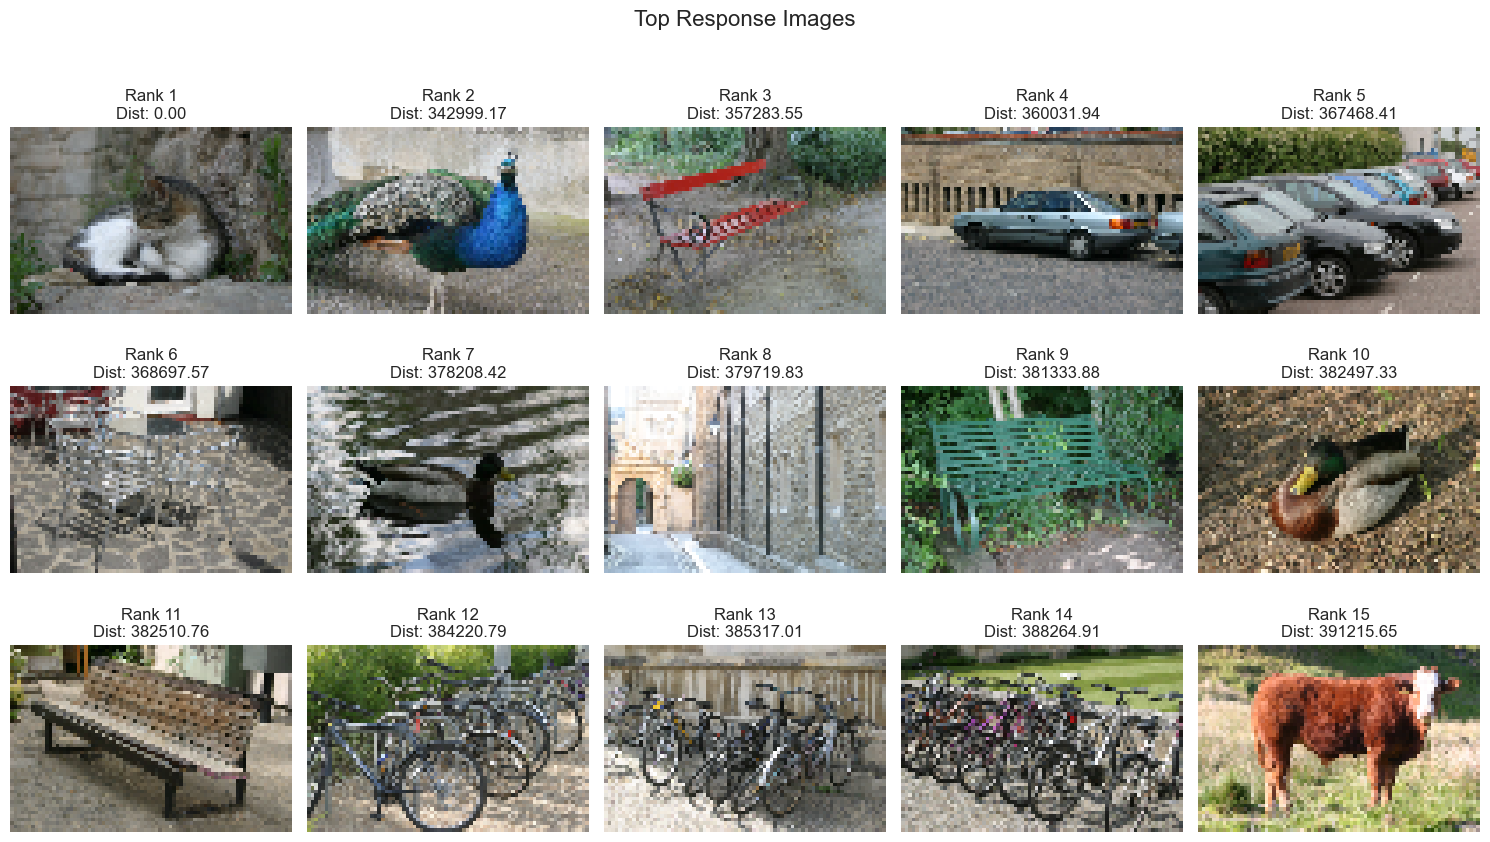

In [37]:
# Compute the distance between the query and all other descriptors
dst_col_ang = []
query = GRID_COLOR_ANGLE_ALLFEAT[queryimg]
for i in range(NIMG):
    candidate = GRID_COLOR_ANGLE_ALLFEAT[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst_col_ang.append((distance, i))

# Sort the distances
dst_col_ang.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_col_ang, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

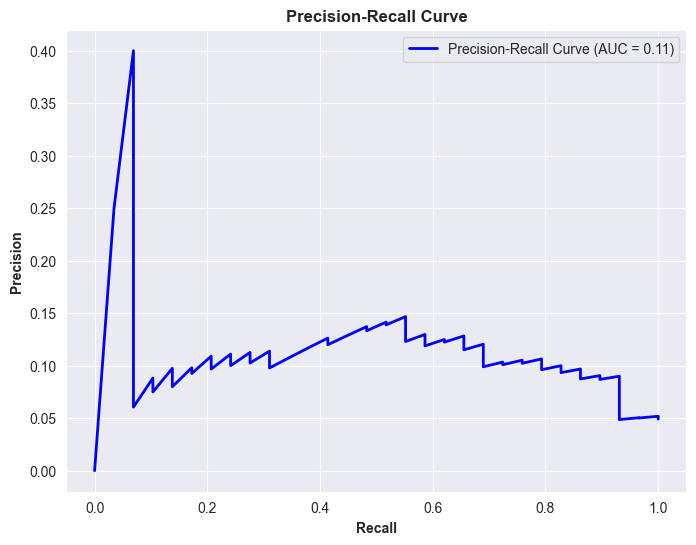

In [38]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_col_ang[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

### 3.1.3 : Peformance Based on Grid + Colour + Mag Histogram  

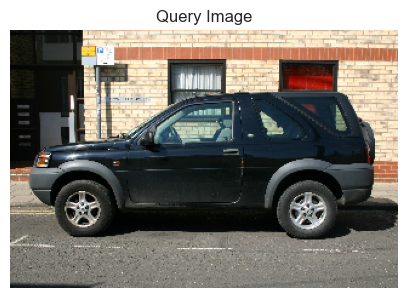

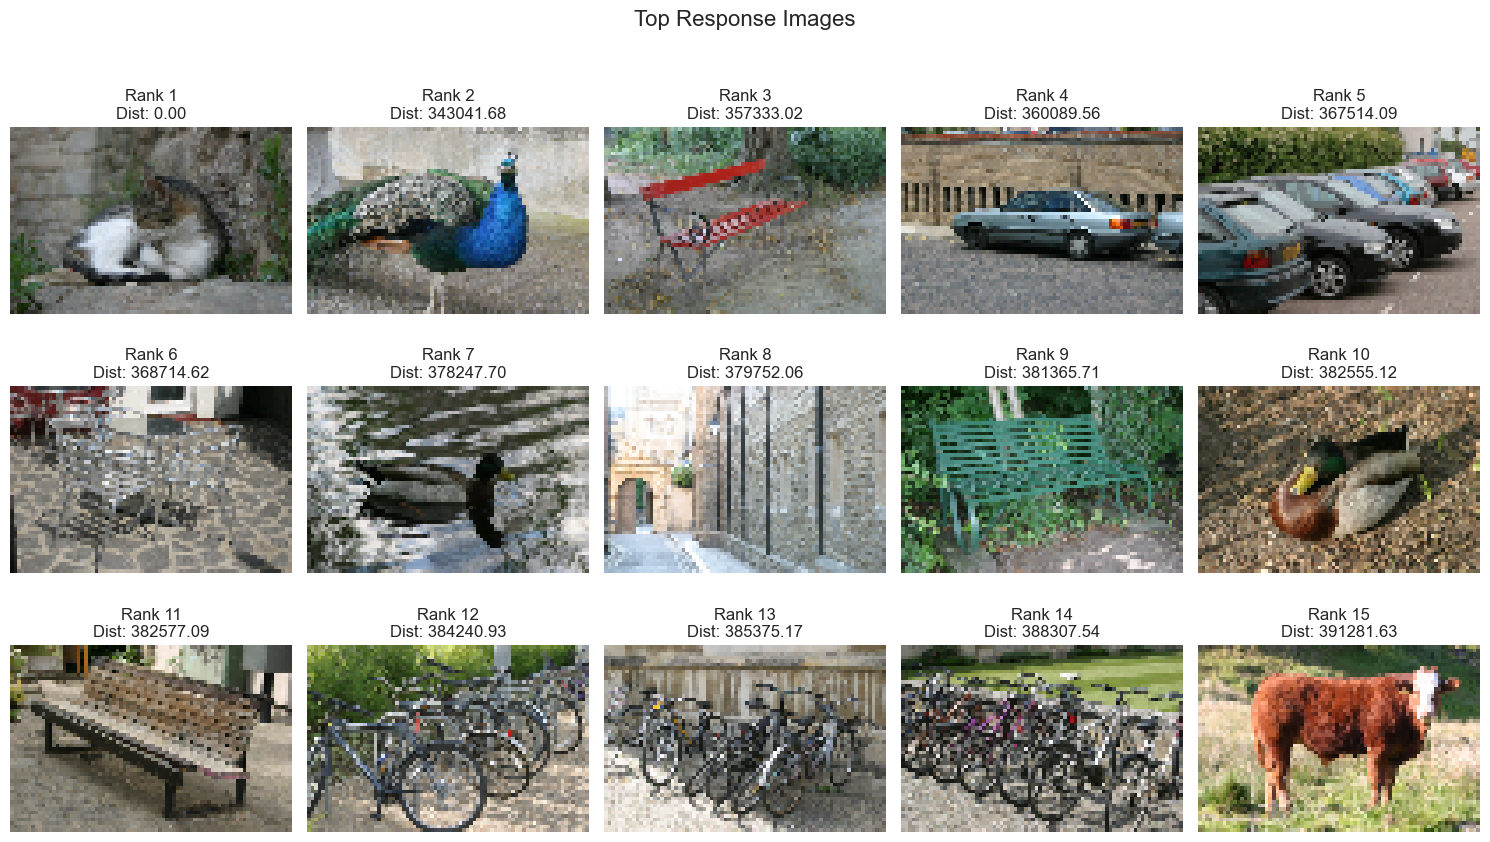

In [39]:
# Compute the distance between the query and all other descriptors
dst_col_mag = []
query = GRID_COLOR_MAG_ALLFEAT[queryimg]
for i in range(NIMG):
    candidate = GRID_COLOR_MAG_ALLFEAT[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst_col_mag.append((distance, i))

# Sort the distances
dst_col_mag.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_col_mag, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

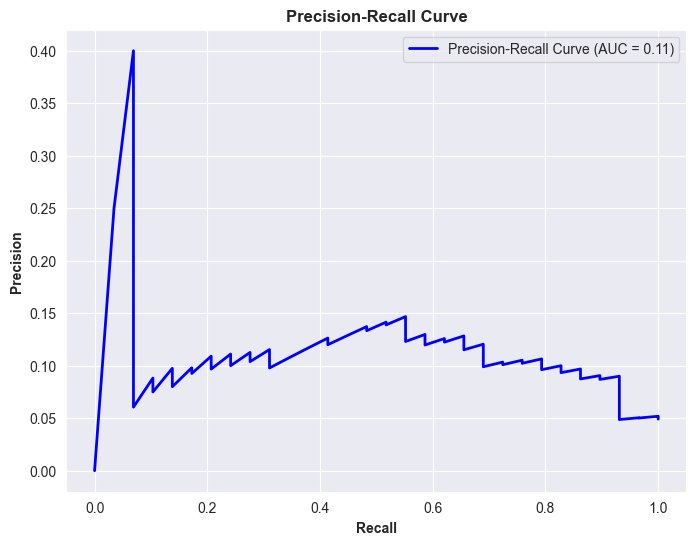

In [40]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_col_mag[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

### 3.2 Performance of different value of Angular Quantization  

In [93]:
import pandas as pd
from cvpr_compute_distance_measure import calculate_auc_for_descriptors
from cvpr_computedescriptors import sobel_quantization

# Setting up
distance_measures = ['L2']

query_img_index = queryimg  # Specify the index of the query image

# Initialize a DataFrame to store results
auc_results_df = pd.DataFrame(columns=['Q', 'Descriptor', 'Distance Measure', 'AUC'])

for Q in range(8, 101, 8):  # Iterate over different levels of Q
    TEMP_ANG_ALLFEAT = []

    for IMG_PATH in ALLFILES:
        image = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
        
        quantized_angles, _,_ = sobel_quantization(image, num_bins=Q)
        quantized_angles = np.bincount(quantized_angles.flatten(), minlength=Q)
        
        TEMP_ANG_ALLFEAT.append(quantized_angles)
    
    TEMP_ANG_ALLFEAT = np.array(TEMP_ANG_ALLFEAT)

    # Prepare descriptors
    descriptors = {
        'ANG_QUANTISATION': TEMP_ANG_ALLFEAT
    }

    # Calculate AUC for the current Q
    auc_df = calculate_auc_for_descriptors(query_img_index, descriptors, distance_measures, ALLFILES)
    auc_df['Q'] = Q  # Add the current Q value to the DataFrame

    # Append results to the main DataFrame
    auc_results_df = pd.concat([auc_results_df, auc_df], ignore_index=True)

# Save the results or process further
print(auc_results_df)


     Q        Descriptor Distance Measure       AUC
0    8  ANG_QUANTISATION               L2  0.159623
1   16  ANG_QUANTISATION               L2  0.491004
2   24  ANG_QUANTISATION               L2  0.555794
3   32  ANG_QUANTISATION               L2  0.605733
4   40  ANG_QUANTISATION               L2  0.609155
5   48  ANG_QUANTISATION               L2  0.605512
6   56  ANG_QUANTISATION               L2  0.592400
7   64  ANG_QUANTISATION               L2  0.619403
8   72  ANG_QUANTISATION               L2  0.614010
9   80  ANG_QUANTISATION               L2  0.627890
10  88  ANG_QUANTISATION               L2  0.615262
11  96  ANG_QUANTISATION               L2  0.627482


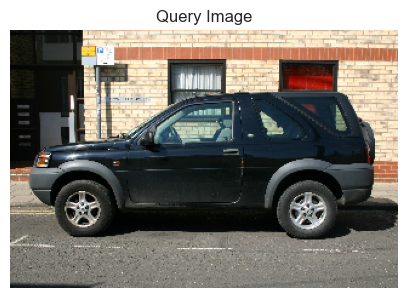

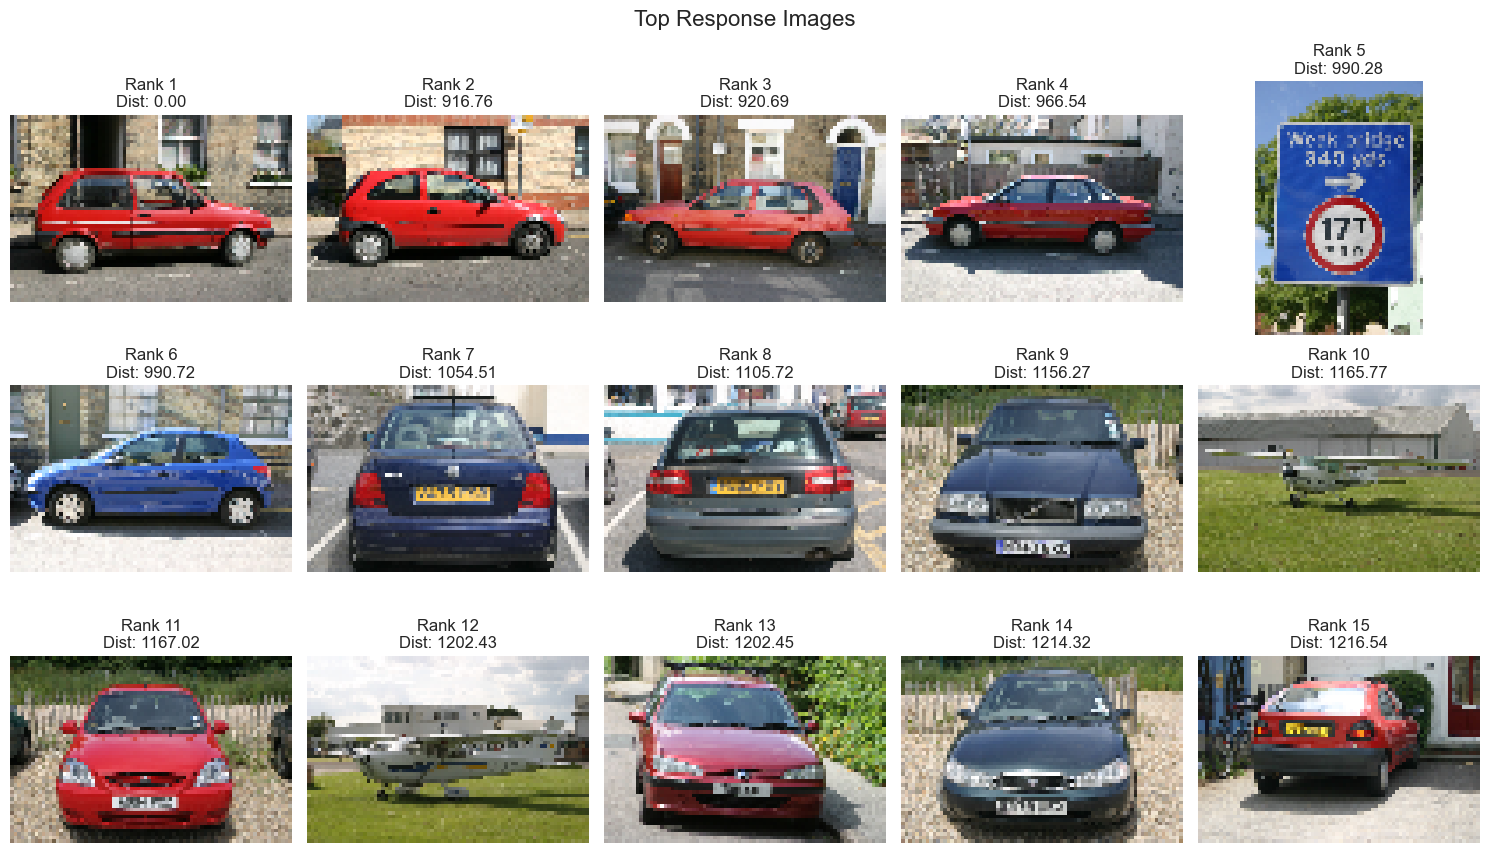

In [94]:
# Compute the distance between the query and all other descriptors
dst_ang = []

query = TEMP_ANG_ALLFEAT[queryimg] # TEMP_ANG_ALLFEAT is used as Q = 96 is the last iter and the best performing
for i in range(NIMG):
    candidate = TEMP_ANG_ALLFEAT[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst_ang.append((distance, i))
    
# Sort the distances
dst_ang.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_ang, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

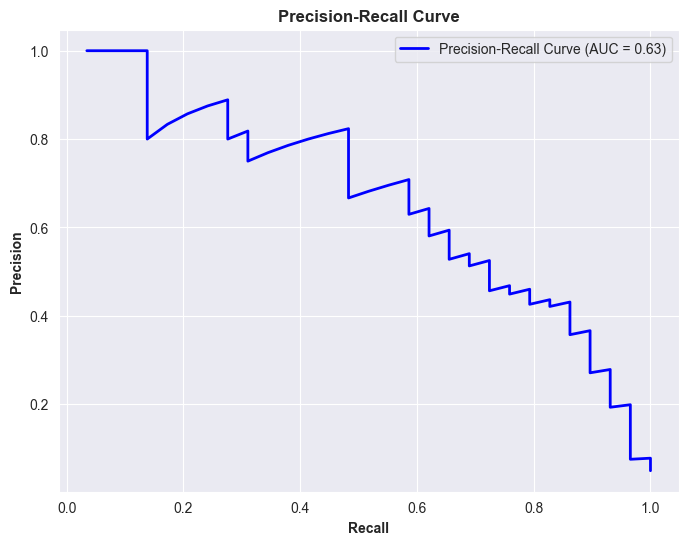

In [95]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_ang[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

# Task 4 : Use of PCA  

In [96]:
from sklearn.decomposition import PCA
import numpy as np
from scipy.spatial.distance import mahalanobis

# Function to calculate Mahalanobis distance between two descriptors
def mahalanobis_distance(descriptor1, descriptor2, inv_cov_matrix):
    return mahalanobis(descriptor1, descriptor2, inv_cov_matrix)

variance_to_explain = 0.9 

pca = PCA(n_components = variance_to_explain) 

## Experiment 4.1: PCA and Mahalanobis Distance Applied to the Best-Performing Angular Quantization (Q = 96)

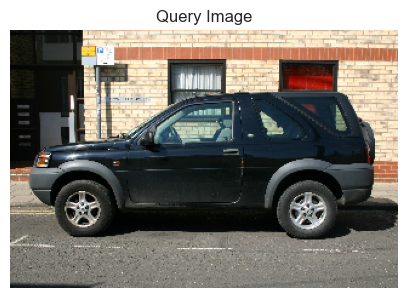

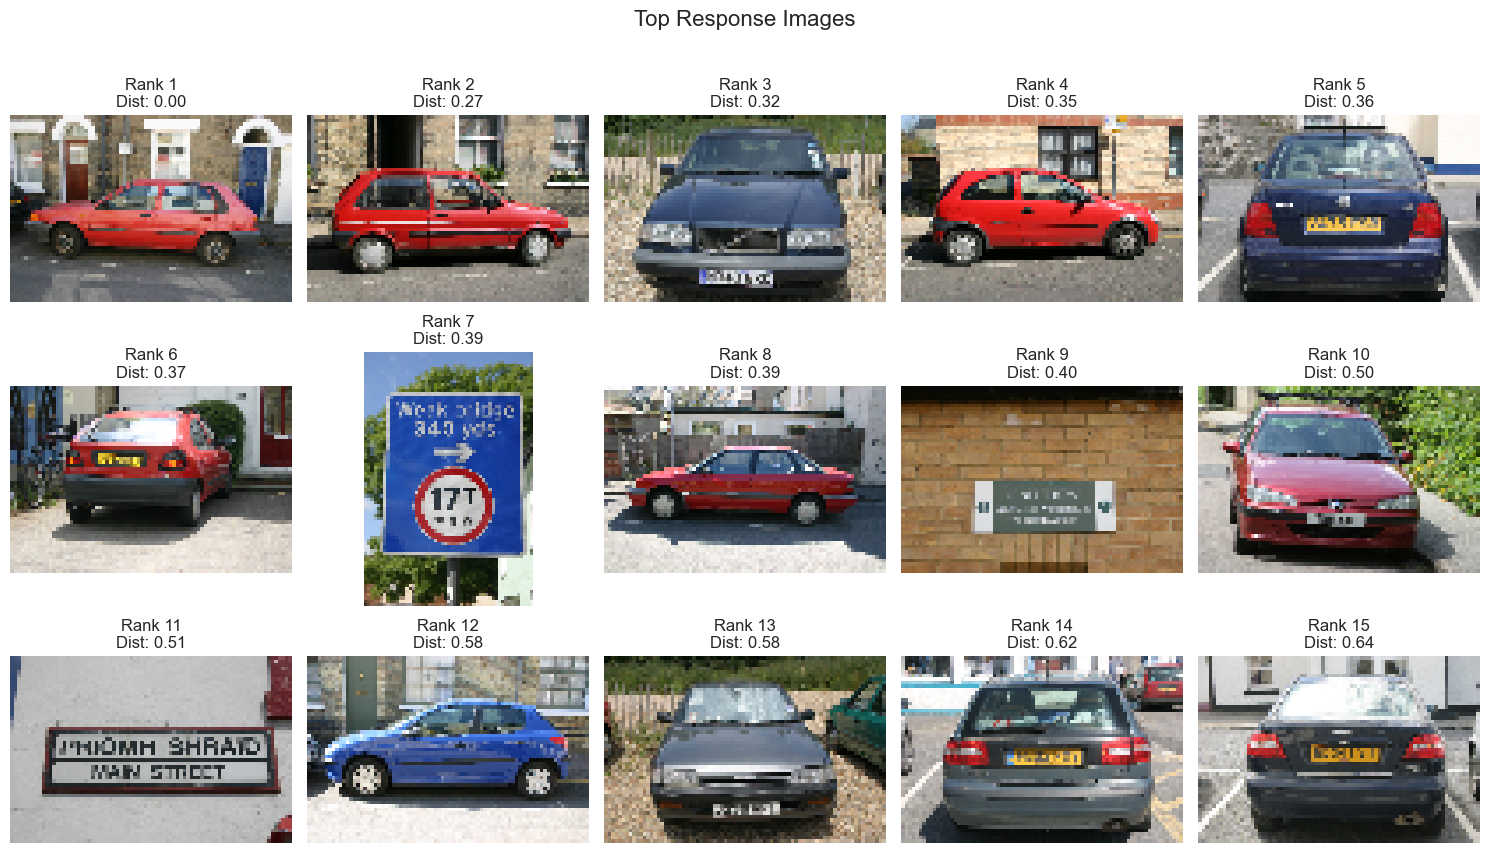

In [97]:
# Fit PCA on descriptors and transform them to lower dimensional space
ANG_HIST_ALLFEAT_REDUCED = pca.fit_transform(TEMP_ANG_ALLFEAT)

# Compute the covariance matrix for low-dimensional descriptors
cov_matrix = np.cov(ANG_HIST_ALLFEAT_REDUCED, rowvar=False)
# Calculate the inverse covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute the distance between the query and all other descriptors
dst_mag = []
query = ANG_HIST_ALLFEAT_REDUCED[queryimg]
for i in range(NIMG):
    candidate = ANG_HIST_ALLFEAT_REDUCED[i]
    distance = mahalanobis_distance(query, candidate,inv_cov_matrix) 
    dst_mag.append((distance, i))

# Sort the distances
dst_mag.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_mag, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

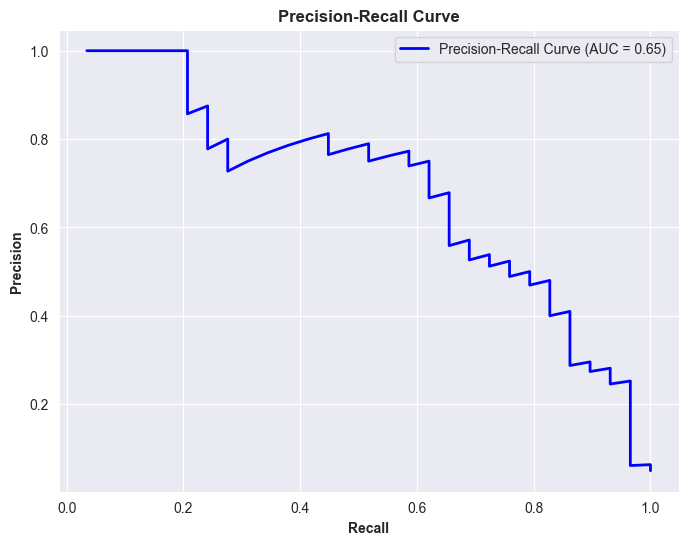

In [98]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_mag[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

In [99]:
ANG_HIST_ALLFEAT_REDUCED.shape

(591, 4)

In [100]:
TEMP_ANG_ALLFEAT.shape

(591, 96)

## Experiment 4.2 : PCA and Mahalanobis Distance Applied to the Grid Colour Texture based descriptor generated in Exp 3.2

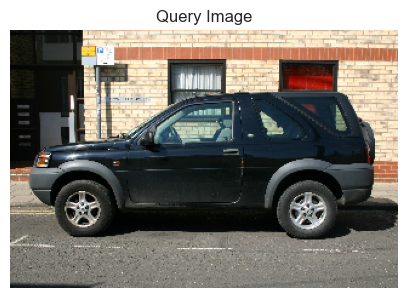

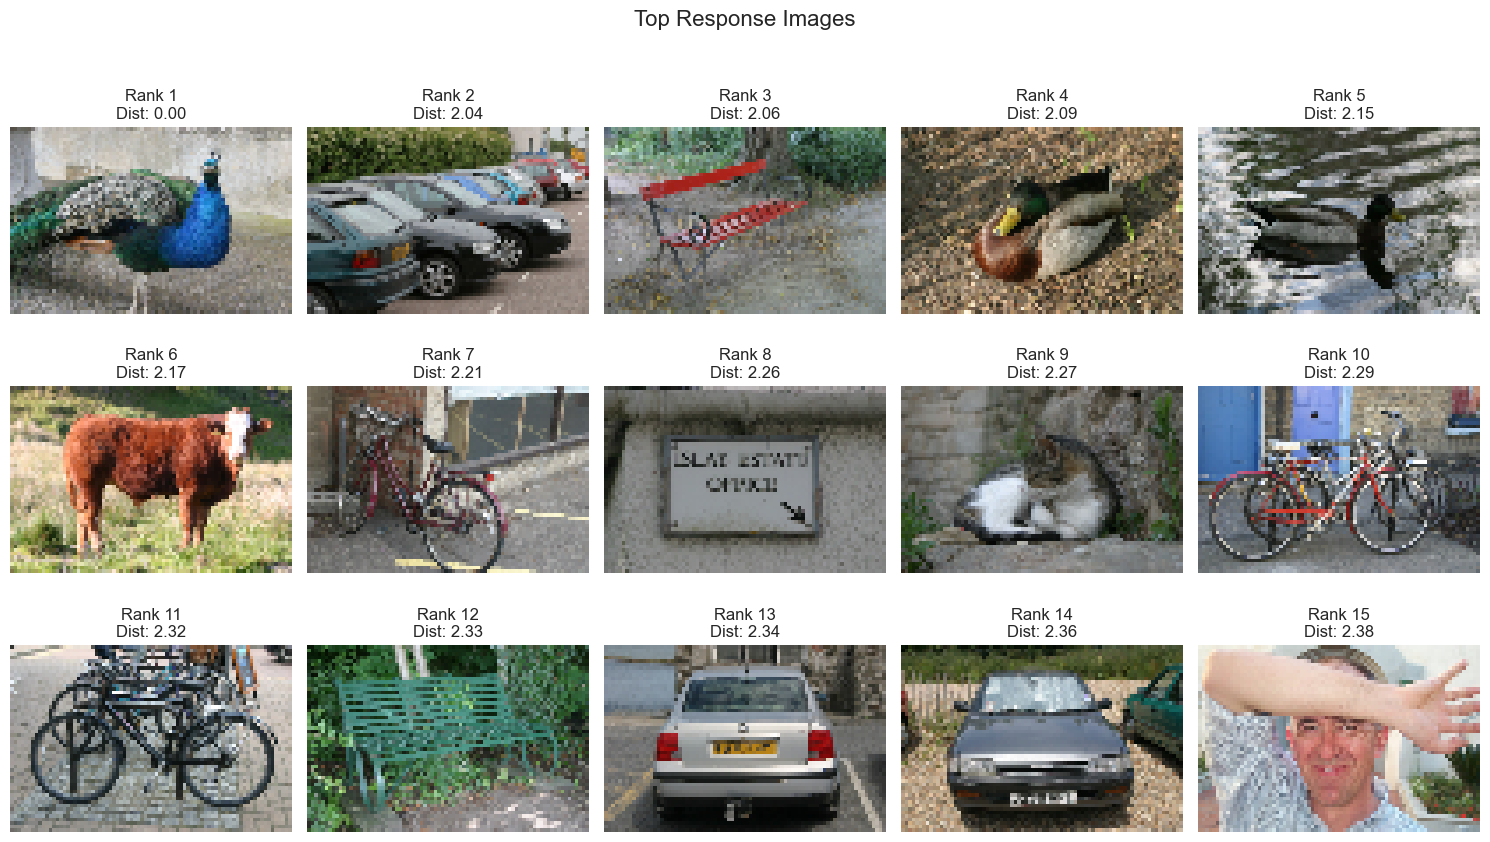

In [75]:
pca = PCA(n_components = variance_to_explain) 

# Fit PCA on descriptors and transform them to lower dimensional space
GRID_COLOR_TEXT_ALLFEAT_REDUCED = pca.fit_transform(GRID_COLOR_TEXT_ALLFEAT)

# Compute the covariance matrix for low-dimensional descriptors
cov_matrix = np.cov(GRID_COLOR_TEXT_ALLFEAT_REDUCED, rowvar=False)
# Calculate the inverse covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute the distance between the query and all other descriptors
dst_grid_col_text = []
query = GRID_COLOR_TEXT_ALLFEAT_REDUCED[queryimg]
for i in range(NIMG):
    candidate = GRID_COLOR_TEXT_ALLFEAT_REDUCED[i]
    distance = mahalanobis_distance(query, candidate,inv_cov_matrix) 
    dst_grid_col_text.append((distance, i))

# Sort the distances
dst_grid_col_text.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_grid_col_text, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

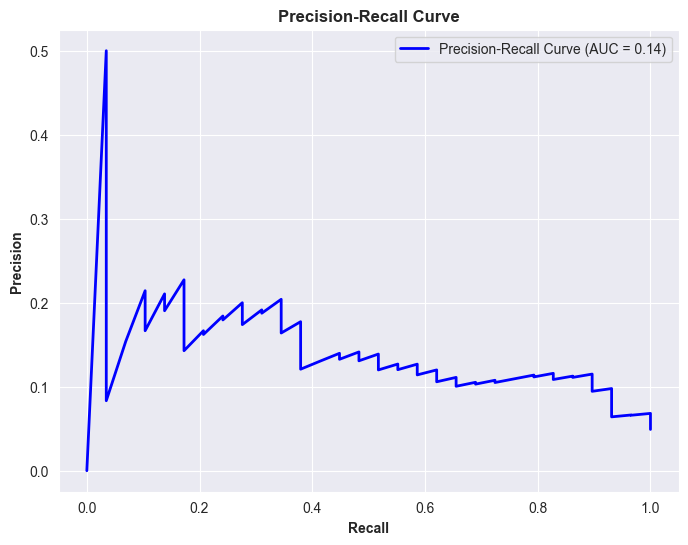

In [76]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_grid_col_text[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

In [ ]:
print("The Shape of Original Feature Vector ",GRID_COLOR_TEXT_ALLFEAT.shape )
print("The Shape of Reduced Feature Vector ",GRID_COLOR_TEXT_ALLFEAT_REDUCED.shape )

## Task 5: Different descriptors and distance measures

In [83]:
from cvpr_computedescriptors import gabor_descriptor,haralick_features
from cvpr_compute_distance_measure import compute_all_distances


GABOR_ALLFEAT = [] 
HARALICK_ALLFEAT = []

for IMG_PATH in ALLFILES:
    image = cv2.imread(IMG_PATH)
    
    temp_gabor_descriptor = gabor_descriptor(image)
    temp_haralick_descriptor = haralick_features(image)
    
    GABOR_ALLFEAT.append(temp_gabor_descriptor)
    HARALICK_ALLFEAT.append(temp_haralick_descriptor)

GABOR_ALLFEAT = np.array(GABOR_ALLFEAT)
HARALICK_ALLFEAT = np.array(HARALICK_ALLFEAT)

### Task 5.1.1 : Other Descriptors :: Gabor Filter

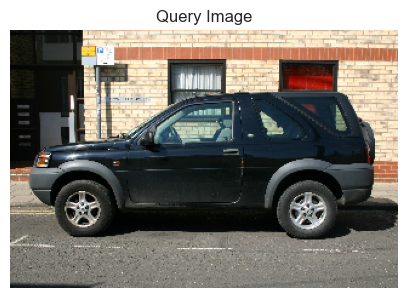

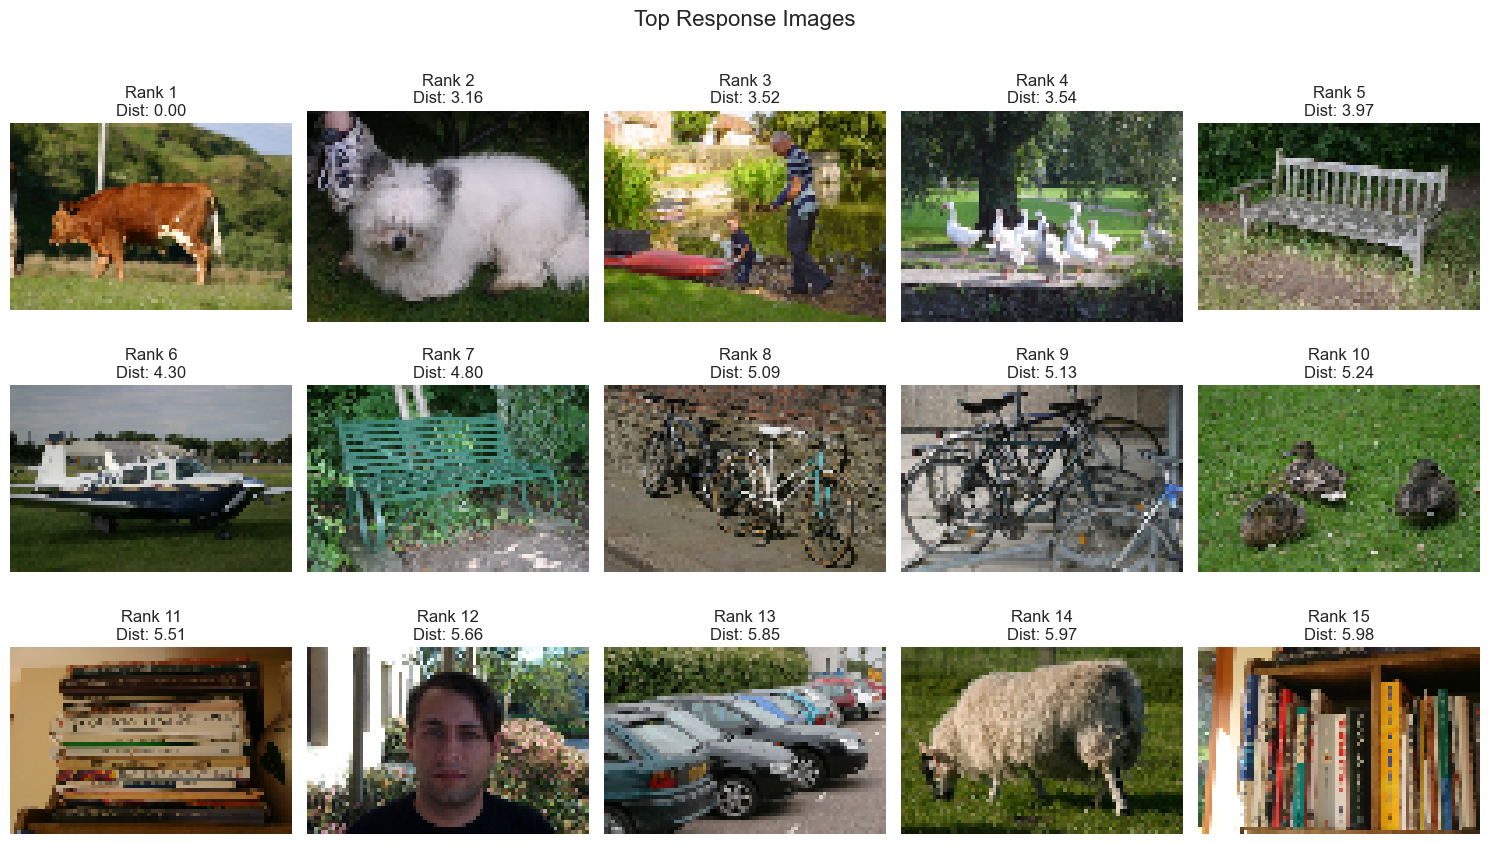

In [84]:
dst_gabor = []
query = GABOR_ALLFEAT[queryimg]
for i in range(NIMG):
    candidate = GABOR_ALLFEAT[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst_gabor.append((distance, i))

# Sort the distances
dst_gabor.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_gabor, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

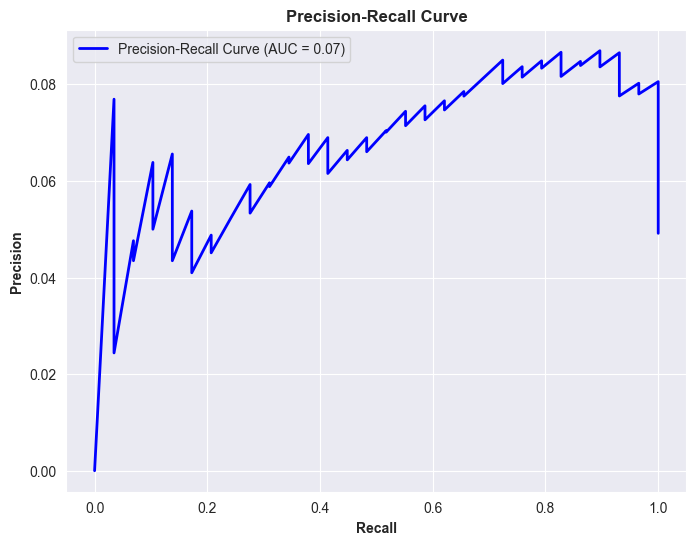

In [85]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_gabor[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

### Task 5.1.2 : Other Descriptors :: Haralick 

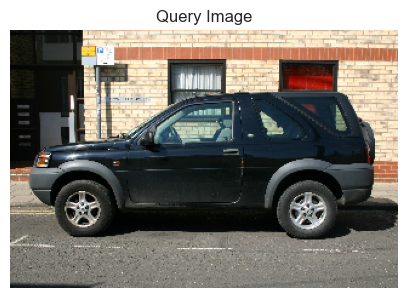

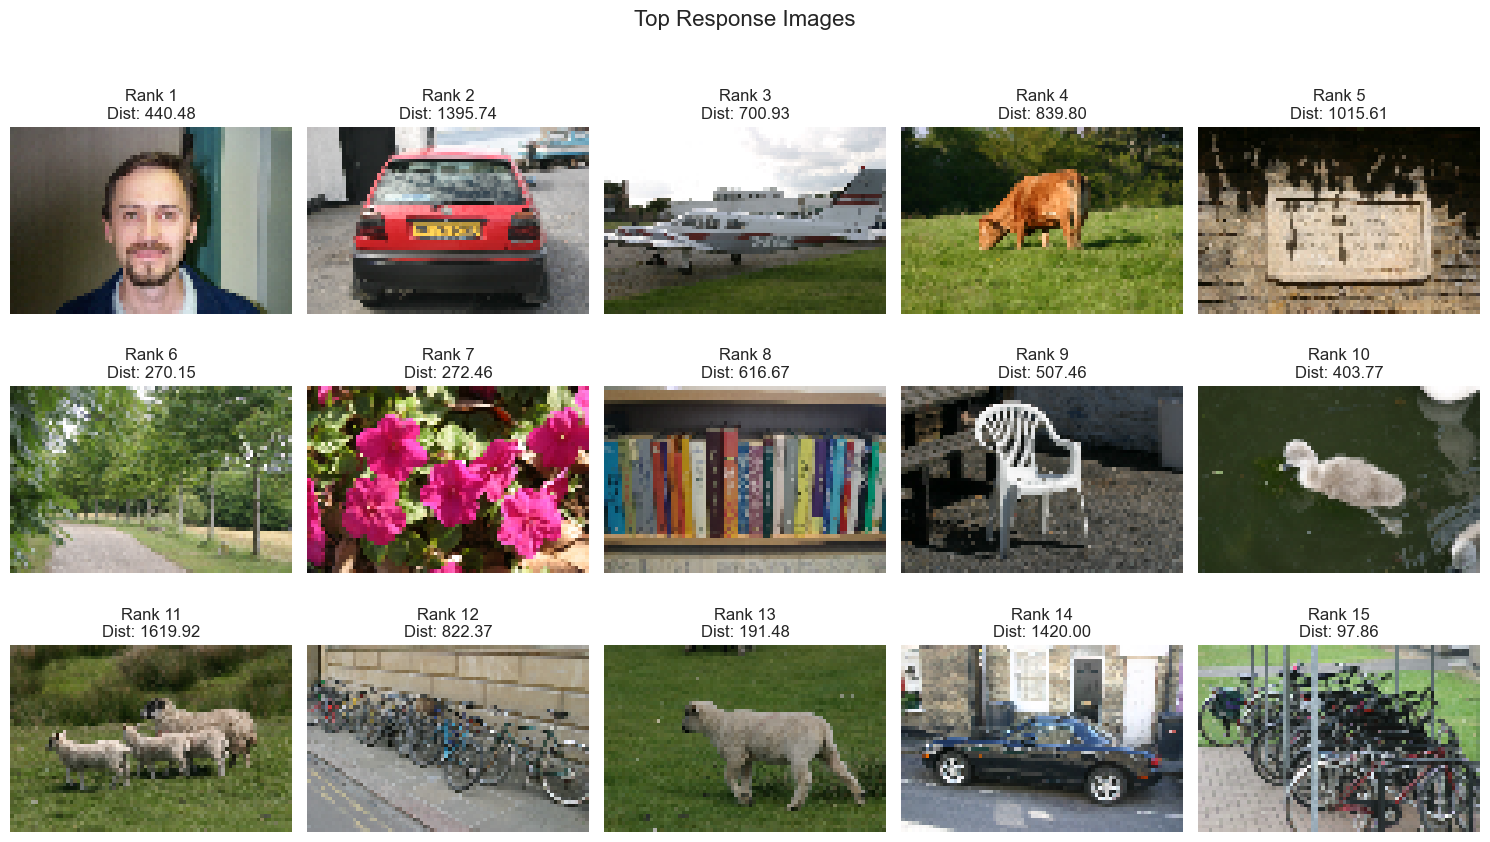

In [86]:
dst_haralick = []
query = HARALICK_ALLFEAT[queryimg]
for i in range(NIMG):
    candidate = HARALICK_ALLFEAT[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst_haralick.append((distance, i))

# Sort the distances
dst_gabor.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_haralick, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

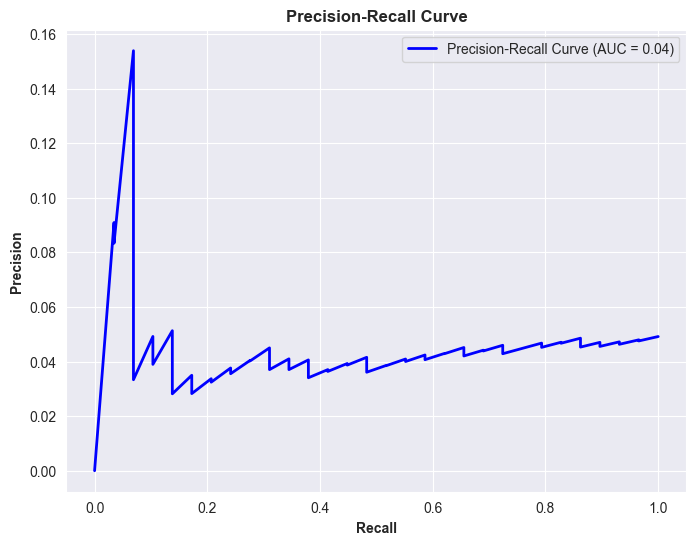

In [87]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_haralick[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)

## Task 5.2 : Other Distance Measures 

In [88]:
import pandas as pd
from sklearn.metrics import auc
from cvpr_compute_distance_measure import calculate_auc_for_descriptors

# Example usage
distance_measures = ['L1', 'L2', 'Chi-Squared', 'Cosine']
descriptors = {
    'HARALICK': HARALICK_ALLFEAT,
    'GABOR': GABOR_ALLFEAT,
    'COLOR_HIST': TEMP_COLOR_ALLFEAT, # Best Performing Global colour hist of exp 1.1
    'GRID_COLOR_TEXT': GRID_COLOR_TEXT_ALLFEAT, # Grid Colour Text Feature of exp 3.2
    'ANGULAR_HIST': TEMP_ANG_ALLFEAT, # Best Performance Angular Hist Q=96
    'GRID_COL_ANG_HIST': GRID_COLOR_ANGLE_ALLFEAT,
    'GRID_COL_MAG_HIST': GRID_COLOR_MAG_ALLFEAT,
    #'BOVW':bovw_histograms
}

# Specify the index of the query image
query_img_index = queryimg  # Change this index based on your needs

# Calculate AUC and return as a DataFrame
auc_results_df = calculate_auc_for_descriptors(query_img_index, descriptors, distance_measures, ALLFILES)

# Display the results DataFrame
print(auc_results_df)


           Descriptor Distance Measure       AUC
0            HARALICK               L1  0.168528
1            HARALICK               L2  0.175826
2            HARALICK      Chi-Squared  0.161992
3            HARALICK           Cosine  0.126287
4               GABOR               L1  0.062430
5               GABOR               L2  0.067429
6               GABOR      Chi-Squared  0.067897
7               GABOR           Cosine  0.145784
8          COLOR_HIST               L1  0.266702
9          COLOR_HIST               L2  0.234464
10         COLOR_HIST      Chi-Squared  0.285754
11         COLOR_HIST           Cosine  0.172692
12    GRID_COLOR_TEXT               L1  0.162449
13    GRID_COLOR_TEXT               L2  0.112726
14    GRID_COLOR_TEXT      Chi-Squared  0.148965
15    GRID_COLOR_TEXT           Cosine  0.101631
16       ANGULAR_HIST               L1  0.624664
17       ANGULAR_HIST               L2  0.627482
18       ANGULAR_HIST      Chi-Squared  0.665342
19       ANGULAR_HIS

# Task 6: Bag of Visual Words Retrieval 

In [108]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import auc


# Extract SIFT features
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    keypoints_list = []
    descriptors_list = []
    
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        if descriptors is not None:
            keypoints_list.append(keypoints)
            descriptors_list.append(descriptors)
    
    return keypoints_list, descriptors_list

# Create codebook using k-means
def create_codebook(descriptors_list, n_clusters=100):
    all_descriptors = np.vstack(descriptors_list)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(all_descriptors)
    return kmeans.cluster_centers_,kmeans

def compute_bovw_histogram(descriptors, codebook,kmeans):
    hist = np.zeros(len(codebook))
    
    if descriptors is not None:
        # Assign each descriptor to the nearest codebook entry
        words = kmeans.predict(descriptors)
        for word in words:
            hist[word] += 1
            
    return hist / hist.sum()  # Normalize the histogram

# Compute BoVW representation
def compute_bovw_representation(images, codebook,kmeans):
    _, descriptors_list = extract_sift_features(images)
    bovw_histograms = []
    
    for descriptors in descriptors_list:
        hist = compute_bovw_histogram(descriptors, codebook,kmeans)
        bovw_histograms.append(hist)
    
    return np.array(bovw_histograms)

# Main function to run the BoVW system and evaluate performance
def run_bovw_system(img_path_arr, n_clusters=100):
    
    # Load images
    images = []
    for img_path in img_path_arr:
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)

    
    # Create BoVW representation
    keypoints_list, descriptors_list = extract_sift_features(images)
    codebook,kmeans = create_codebook(descriptors_list, n_clusters)
    bovw_histograms = compute_bovw_representation(images, codebook,kmeans)
    
    return bovw_histograms,codebook

bovw_histograms,codebook = run_bovw_system(ALLFILES, n_clusters=100)

/Users/dhruvraj/venv-metal/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


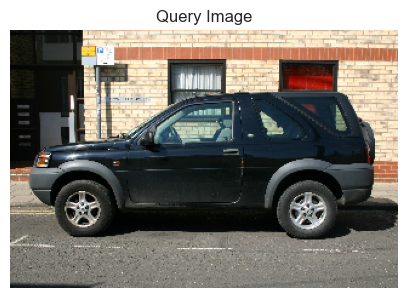

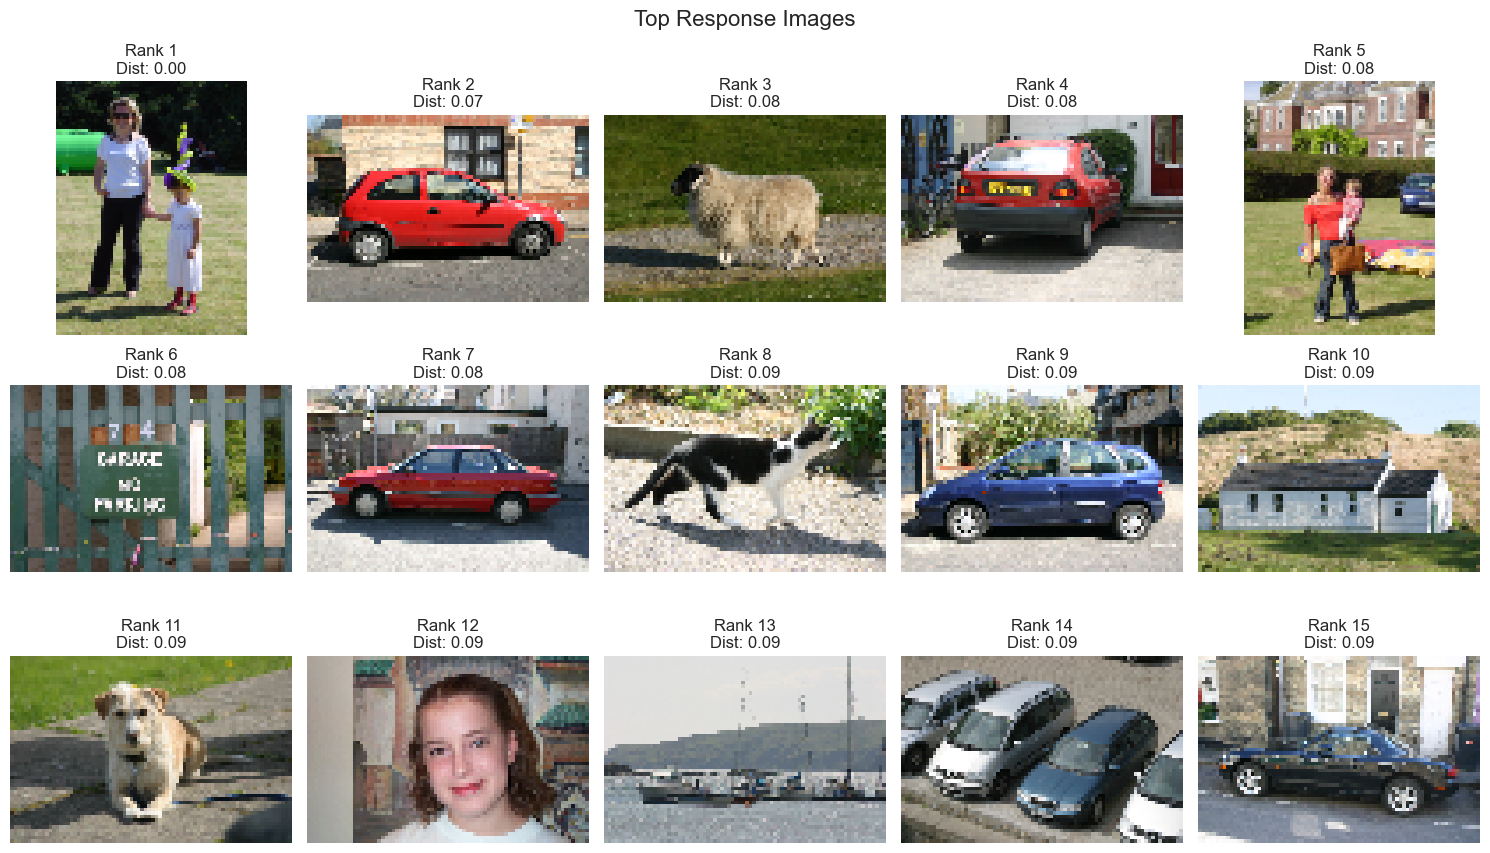

In [109]:
dst_bovw = []
query = bovw_histograms[queryimg]
for i in range(NIMG):
    candidate = bovw_histograms[i]
    distance = cvpr_compare(query, candidate,'L2') 
    dst_bovw.append((distance, i))

# Sort the distances
dst_bovw.sort(key=lambda x: x[0])

display_query_and_top_responses(query_img_index = queryimg, 
                                    response_indices=dst_bovw, 
                                    file_paths = ALLFILES, num_responses=15, grid_shape=(3, 5))

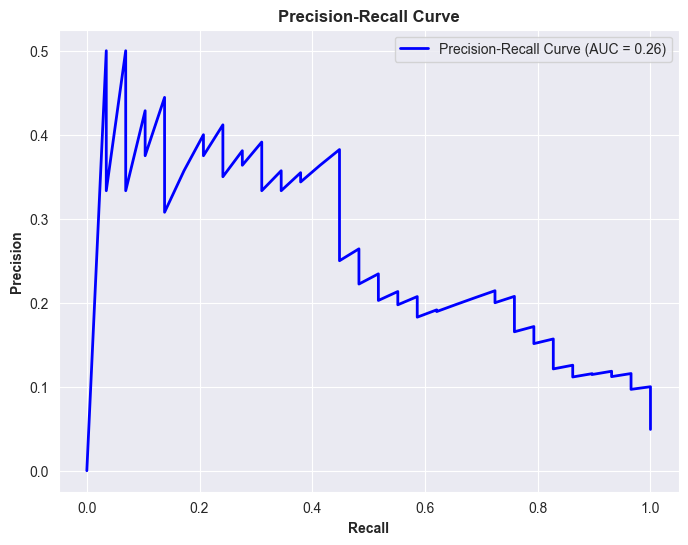

In [110]:
from cvpr_toolset import extract_class_and_file

response_class_no = []
for img_no in range(len(ALLFILES)):
    temp_class , temp_file = extract_class_and_file(ALLFILES[dst_bovw[img_no][1]])
    response_class_no.append(temp_class)
    

query_class =   response_class_no[0]
response_class = response_class_no[1:]

plot_precision_recall_curve(response_class, query_class)